In [46]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

import math
import statistics
import scipy.stats
pd.set_option('display.max.columns',None)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
df = pd.read_csv('./dataset/bank-full.csv',sep=";")

In [8]:
#melihat 5 data teratas
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
#melihat 5 data terbawah
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [11]:
#melihat jumlah baris dan kolom
df.shape

(45211, 17)

In [12]:
#melihat informasi kolom dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
listfeatures = ['age','job','marital','education','default','housing','loan','contact','duration']
df[listfeatures].describe()

,age,duration
count,45211.000000,45211.000000
mean,40.936210,258.163080
std,10.618762,257.527812
min,18.000000,0.000000
25%,33.000000,103.000000
50%,39.000000,180.000000
75%,48.000000,319.000000
max,95.000000,4918.000000


In [14]:
for i in listfeatures:
    print(df[i].value_counts(),'\n')

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
88       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int64 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

124     188
90      184
89      177
114     175
122     175
       ... 
972       1
1132      1
2456      1

In [19]:
print('total data setelah : ', len(df[(df['education']!='illiterate')& (df['marital']!='unknown') & (df['default']!='yes')][listfeatures]))

total data setelah :  44396


In [17]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','amount missing']))

Empty DataFrame
Columns: []
Index: [percent missing, amount missing]


In [61]:
#kondisi data setelah missing value dihilangkan
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_konversi,data_job_konversi,data_marital_konversi,data_education_konversi,data_default_konversi,data_housing_konversi,data_loan_konversi,data_contact_konversi
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,4,1,2,0,1,0,2
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,9,2,1,0,1,0,2
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,2,1,1,0,1,1,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,1,1,3,0,1,0,2
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,11,2,3,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1,9,1,2,0,0,0,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1,5,0,0,0,0,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1,5,1,1,0,0,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,1,1,1,0,0,0,1


In [20]:
#konversi data menjadi numeric
from sklearn.preprocessing import LabelEncoder
y = df['y'].values
print('data y sebelum konversi: ',y)
label_y_encoder = LabelEncoder().fit(y)
y_konversi = label_y_encoder.transform(y)
print('data y setelah konversi: ',y_konversi)
print('class before transform: ',label_y_encoder.classes_)

data y sebelum konversi:  ['no' 'no' 'no' ... 'yes' 'no' 'no']
data y setelah konversi:  [0 0 0 ... 1 0 0]
class before transform:  ['no' 'yes']


In [21]:
data_job = df['job'].values
print('data job 1 sebelum konversi: ',data_job)
label_datajob_encoder = LabelEncoder().fit(data_job)
data_job_konversi = label_datajob_encoder.transform(data_job)
print('data feature job setelah konversi: ',data_job_konversi)

data_marital = df['marital'].values
print('data marital 1 sebelum konversi: ',data_marital)
label_datamarital_encoder = LabelEncoder().fit(data_marital)
data_marital_konversi = label_datamarital_encoder.transform(data_marital)
print('data feature marital setelah konversi: ',data_marital_konversi)

data_education = df['education'].values
print('data education 1 sebelum konversi: ',data_education)
label_dataeducation_encoder = LabelEncoder().fit(data_education)
data_education_konversi = label_dataeducation_encoder.transform(data_education)
print('data feature education setelah konversi: ',data_education_konversi)

data_default = df['default'].values
print('data default 1 sebelum konversi: ',data_default)
label_datadefault_encoder = LabelEncoder().fit(data_default)
data_default_konversi = label_datadefault_encoder.transform(data_default)
print('data feature default setelah konversi: ',data_default_konversi)

data_housing = df['housing'].values
print('data housing 1 sebelum konversi: ',data_housing)
label_datahousing_encoder = LabelEncoder().fit(data_housing)
data_housing_konversi = label_datahousing_encoder.transform(data_housing)
print('data feature housing setelah konversi: ',data_housing_konversi)

data_loan = df['loan'].values
print('data loan 1 sebelum konversi: ',data_loan)
label_dataloan_encoder = LabelEncoder().fit(data_loan)
data_loan_konversi = label_dataloan_encoder.transform(data_loan)
print('data feature loan setelah konversi: ',data_loan_konversi)

data_contact = df['contact'].values
print('data contact 1 sebelum konversi: ',data_contact)
label_datacontact_encoder = LabelEncoder().fit(data_contact)
data_contact_konversi = label_datacontact_encoder.transform(data_contact)
print('data feature contact setelah konversi: ',data_contact_konversi)

data job 1 sebelum konversi:  ['management' 'technician' 'entrepreneur' ... 'retired' 'blue-collar'
 'entrepreneur']
data feature job setelah konversi:  [4 9 2 ... 5 1 2]
data marital 1 sebelum konversi:  ['married' 'single' 'married' ... 'married' 'married' 'married']
data feature marital setelah konversi:  [1 2 1 ... 1 1 1]
data education 1 sebelum konversi:  ['tertiary' 'secondary' 'secondary' ... 'secondary' 'secondary'
 'secondary']
data feature education setelah konversi:  [2 1 1 ... 1 1 1]
data default 1 sebelum konversi:  ['no' 'no' 'no' ... 'no' 'no' 'no']
data feature default setelah konversi:  [0 0 0 ... 0 0 0]
data housing 1 sebelum konversi:  ['yes' 'yes' 'yes' ... 'no' 'no' 'no']
data feature housing setelah konversi:  [1 1 1 ... 0 0 0]
data loan 1 sebelum konversi:  ['no' 'no' 'yes' ... 'no' 'no' 'no']
data feature loan setelah konversi:  [0 0 1 ... 0 0 0]
data contact 1 sebelum konversi:  ['unknown' 'unknown' 'unknown' ... 'cellular' 'telephone' 'cellular']
data feature

In [22]:
df['y_konversi'] = y_konversi
df['data_job_konversi'] = data_job_konversi
df['data_marital_konversi'] = data_marital_konversi
df['data_education_konversi'] = data_education_konversi
df['data_default_konversi'] = data_default_konversi
df['data_housing_konversi'] = data_housing_konversi
df['data_loan_konversi'] = data_loan_konversi
df['data_contact_konversi'] = data_contact_konversi
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_konversi,data_job_konversi,data_marital_konversi,data_education_konversi,data_default_konversi,data_housing_konversi,data_loan_konversi,data_contact_konversi
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,4,1,2,0,1,0,2
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,9,2,1,0,1,0,2
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,2,1,1,0,1,1,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,1,1,3,0,1,0,2
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,11,2,3,0,0,0,2


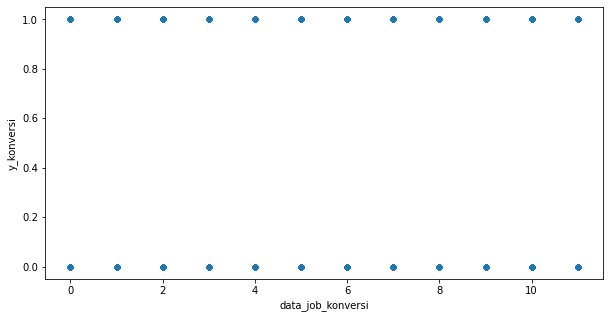

In [23]:
df_job_target = df[['y_konversi','data_job_konversi']]
df_job_target.plot(kind='scatter', x='data_job_konversi', y='y_konversi', figsize=(10,5))
plt.show()

In [24]:
df.groupby(by=['y_konversi'])['data_job_konversi'].count()

y_konversi
0    39922
1     5289
Name: data_job_konversi, dtype: int64

In [25]:
df.groupby(by=['y_konversi','data_job_konversi'])['data_job_konversi'].count()

y_konversi  data_job_konversi
0           0                    4540
            1                    9024
            2                    1364
            3                    1131
            4                    8157
            5                    1748
            6                    1392
            7                    3785
            8                     669
            9                    6757
            10                   1101
            11                    254
1           0                     631
            1                     708
            2                     123
            3                     109
            4                    1301
            5                     516
            6                     187
            7                     369
            8                     269
            9                     840
            10                    202
            11                     34
Name: data_job_konversi, dtype: int64

In [26]:
job_konv_group = df.groupby(by=['job','y'])['job'].count()
job_konv_group

job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
Name: job, dtype: int64

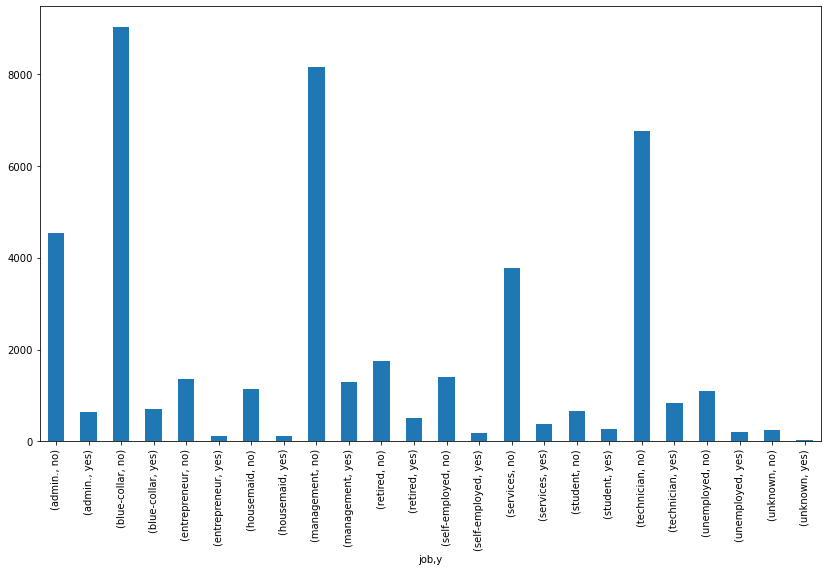

In [27]:
job_konv_group.plot(kind='bar',figsize=(14,8))
plt.show()

In [28]:
##mencari shape data
data_feature= df[['age','data_job_konversi']].values
print('data feature:',data_feature )
print('shape data feature:',data_feature.shape )

target_y_konversi = df[['y_konversi']].values.reshape(len(y_konversi))
print('data y:',target_y_konversi )
print('shape data y:',target_y_konversi.shape )

data feature: [[58  4]
 [44  9]
 [33  2]
 ...
 [72  5]
 [57  1]
 [37  2]]
shape data feature: (45211, 2)
data y: [0 0 0 ... 1 0 0]
shape data y: (45211,)


In [29]:
##modelling menggunakan 5 feature
data_5feature = df[['age','data_job_konversi', 'data_loan_konversi', 'data_default_konversi', 'duration']].values
print('data 5feature:',data_5feature )
print('shape data 5feature:',data_5feature.shape )
##modelling menggunakan 9 feature
target_y_konversi_5f = df[['y_konversi']].values.reshape(len(y_konversi))
print('data y:',target_y_konversi )
print('shape data y:',target_y_konversi.shape )

data 5feature: [[  58    4    0    0  261]
 [  44    9    0    0  151]
 [  33    2    1    0   76]
 ...
 [  72    5    0    0 1127]
 [  57    1    0    0  508]
 [  37    2    0    0  361]]
shape data 5feature: (45211, 5)
data y: [0 0 0 ... 1 0 0]
shape data y: (45211,)


In [30]:
data_9feature = df[['age','data_job_konversi','data_marital_konversi','data_education_konversi','data_default_konversi','data_housing_konversi','data_loan_konversi','data_contact_konversi', 'duration']].values
print('data 9 feature:',data_9feature )
print('shape data 9 feature:',data_9feature.shape )

target_y_konversi_9f = df[['y_konversi']].values.reshape(len(y_konversi))
print('data y:',target_y_konversi )
print('shape data y:',target_y_konversi.shape )

data 9 feature: [[  58    4    1 ...    0    2  261]
 [  44    9    2 ...    0    2  151]
 [  33    2    1 ...    1    2   76]
 ...
 [  72    5    1 ...    0    0 1127]
 [  57    1    1 ...    0    1  508]
 [  37    2    1 ...    0    0  361]]
shape data 9 feature: (45211, 9)
data y: [0 0 0 ... 1 0 0]
shape data y: (45211,)


In [ ]:
###KNN

In [32]:
model_ykonv_5f = KNeighborsClassifier(n_neighbors=5).fit(data_5feature,target_y_konversi_5f)

model_ykonv_9f = KNeighborsClassifier(n_neighbors=5).fit(data_9feature,target_y_konversi_9f)

In [33]:
prediksi_ykonv_5f = model_ykonv_5f.predict(data_5feature)
print(prediksi_ykonv_5f)


prediksi_ykonv_9f = model_ykonv_9f.predict(data_9feature)
print(prediksi_ykonv_9f)

[0 0 0 ... 1 0 0]
[0 0 0 ... 1 0 0]


In [ ]:
###PERFORMANCE

In [34]:
performance_model_5f = model_ykonv_5f.score(data_5feature,target_y_konversi_5f)
print('performance model 5 features : ',performance_model_5f)

performance_model_9f = model_ykonv_9f.score(data_9feature,target_y_konversi_9f)
print('performance model 9 features : ',performance_model_9f)

performance model 5 features :  0.906969542810378
performance model 9 features :  0.9086947866669616


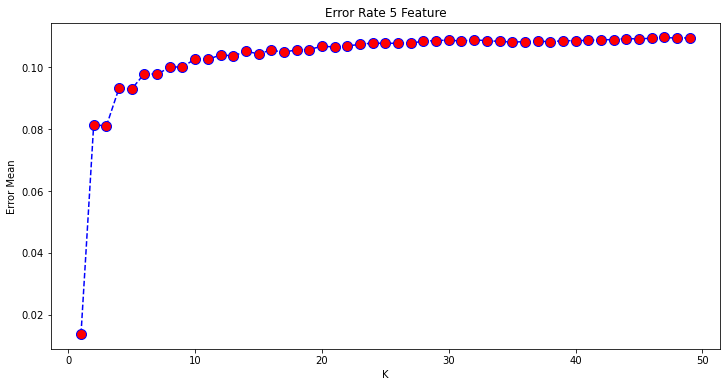

In [35]:
error_5f = []
neighbors_loop = range(1,50)
for x in neighbors_loop:
    model_ykonv_5f_loop = KNeighborsClassifier(n_neighbors=x).fit(data_5feature,target_y_konversi_5f)
    prediksi_ykonv_5f_loop = model_ykonv_5f_loop.predict(data_5feature)
    error_5f.append(np.mean(prediksi_ykonv_5f_loop!=target_y_konversi_5f))
plt.figure(figsize=(12,6))
plt.plot(neighbors_loop,error_5f, color = 'blue', linestyle = 'dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate 5 Feature')
plt.xlabel('K')
plt.ylabel('Error Mean')
plt.show()

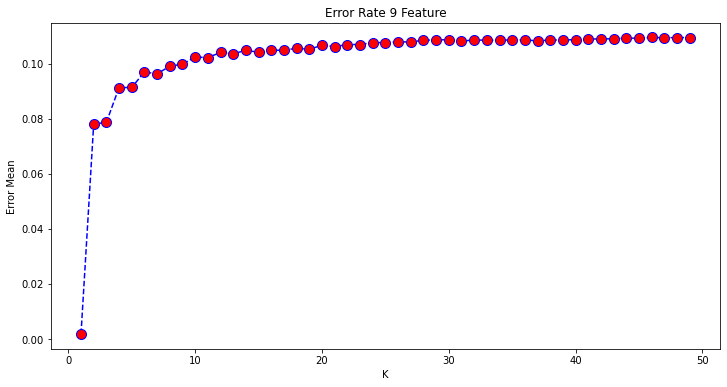

In [36]:
error_9f = []
neighbors_loop = range(1,50)
for x in neighbors_loop:
    model_ykonv_loop_9f = KNeighborsClassifier(n_neighbors=x).fit(data_9feature,target_y_konversi_9f)
    prediksi_ykonv_loop_9f = model_ykonv_loop_9f.predict(data_9feature)
    error_9f.append(np.mean(prediksi_ykonv_loop_9f!=target_y_konversi_9f))
plt.figure(figsize=(12,6))
plt.plot(neighbors_loop,error_9f, color = 'blue', linestyle = 'dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate 9 Feature')
plt.xlabel('K')
plt.ylabel('Error Mean')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
features_data = df[['age','data_job_konversi', 'data_loan_konversi', 'data_default_konversi', 'duration']].values
target_data = df[['y_konversi']].values.reshape(-1,1)

x_5f_train,x_5f_test,y_5f_train,y_5f_test = train_test_split(features_data,target_data,test_size=0.25)
y_5f_test = y_5f_test.reshape(len(y_5f_test))
y_5f_train = y_5f_train.reshape(len(y_5f_train))
print('shape feature total: ', features_data.shape)
print('shape feature train: ', x_5f_train.shape)
print('shape feature test: ', x_5f_test.shape)
print('shape target test: ', y_5f_test.shape)

shape feature total:  (45211, 5)
shape feature train:  (33908, 5)
shape feature test:  (11303, 5)
shape target test:  (11303,)


In [38]:
features_9f_data = df[['age','data_job_konversi','data_marital_konversi','data_education_konversi','data_default_konversi','data_housing_konversi','data_loan_konversi','data_contact_konversi', 'duration']].values
target_9f_data = df[['y_konversi']].values.reshape(-1,1)

x_9f_train,x_9f_test,y_9f_train,y_9f_test = train_test_split(features_9f_data,target_9f_data,test_size=0.25)
y_9f_test = y_9f_test.reshape(len(y_9f_test))
y_9f_train = y_9f_train.reshape(len(y_9f_train))
print('shape feature total: ', features_9f_data.shape)
print('shape feature train: ', x_9f_train.shape)
print('shape feature test: ', x_9f_test.shape)
print('shape target test: ', y_9f_test.shape)

shape feature total:  (45211, 9)
shape feature train:  (33908, 9)
shape feature test:  (11303, 9)
shape target test:  (11303,)


In [ ]:
###NAIVE BAYES

In [40]:
model_5f_GNB = GaussianNB().fit(x_5f_train,y_5f_train)
model_9f_GNB = GaussianNB().fit(x_9f_train,y_9f_train)

In [41]:
y_5f_train_prediksi_GNB = model_5f_GNB.predict(x_5f_train)
print(y_5f_train_prediksi_GNB)


y_9f_train_prediksi_GNB = model_9f_GNB.predict(x_9f_train)
print(y_9f_train_prediksi_GNB)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [42]:
perf_model_5f_GNB = model_5f_GNB.score(x_5f_train,y_5f_train)
print('performance model 5 features Naive Bayes : ',perf_model_5f_GNB)


perf_model_9f_GNB = model_9f_GNB.score(x_9f_train,y_9f_train)
print('performance model 9 features Naive Bayes : ',perf_model_9f_GNB)

performance model 5 features Naive Bayes :  0.8868703550784476
performance model 9 features Naive Bayes :  0.8883744249144745


In [43]:
conf_matrix_5f_GNB = confusion_matrix(y_5f_train,y_5f_train_prediksi_GNB)
print(conf_matrix_5f_GNB)

conf_matrix_9f_GNB = confusion_matrix(y_9f_train,y_9f_train_prediksi_GNB)
print(conf_matrix_9f_GNB)

[[28800  1164]
 [ 2672  1272]]
[[28680  1274]
 [ 2511  1443]]


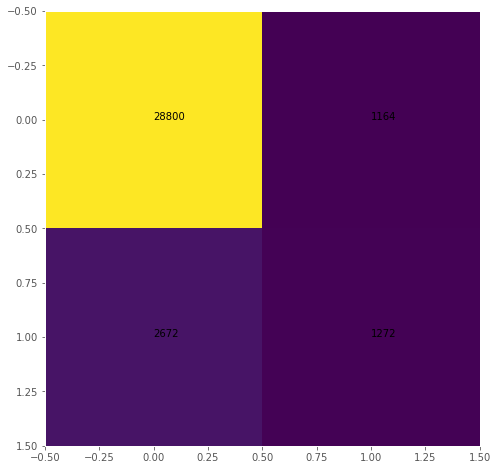

In [44]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_5f_GNB)
ax.grid(False)
for i in range (len(conf_matrix_5f_GNB[0])):
    for j in range (len(conf_matrix_5f_GNB[0])):
        ax.text(j,i,conf_matrix_5f_GNB[i,j])
plt.show()

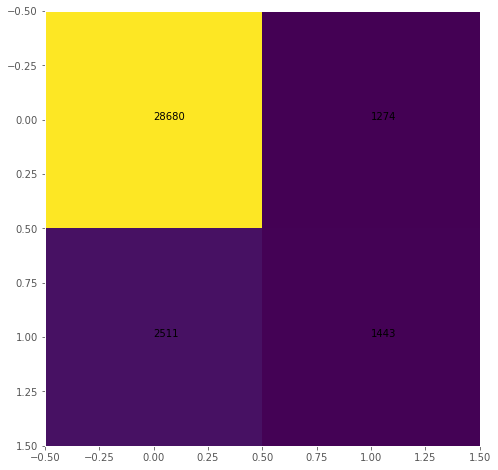

In [45]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_9f_GNB)
ax.grid(False)
for i in range (len(conf_matrix_9f_GNB[0])):
    for j in range (len(conf_matrix_9f_GNB[0])):
        ax.text(j,i,conf_matrix_9f_GNB[i,j])
plt.show()

In [ ]:
###RANDOM FOREST

In [47]:
model_5f_RF = RandomForestClassifier().fit(x_5f_train,y_5f_train)

model_9f_RF = RandomForestClassifier().fit(x_9f_train,y_9f_train)

In [48]:
y_train_prediksi_5f_RF = model_5f_RF.predict(x_5f_train)
print(y_train_prediksi_5f_RF)


y_train_prediksi_9f_RF = model_9f_RF.predict(x_9f_train)
print(y_train_prediksi_9f_RF)

[0 0 0 ... 0 0 0]
[0 1 0 ... 0 1 0]


In [49]:
perf_model_5f_RF = model_5f_RF.score(x_5f_train,y_5f_train)
print('performance model RF 5 features : ',perf_model_5f_RF)


perf_model_9f_RF = model_9f_RF.score(x_9f_train,y_9f_train)
print('performance model RF 9 features : ',perf_model_9f_RF)

performance model RF 5 features :  0.9898254099327592
performance model RF 9 features :  0.9983484723369116


In [50]:
conf_matrix_5f_RF = confusion_matrix(y_5f_train,y_train_prediksi_5f_RF)
print(conf_matrix_5f_RF)
conf_matrix_9f_RF = confusion_matrix(y_9f_train,y_train_prediksi_9f_RF)
print(conf_matrix_9f_RF)

[[29914    50]
 [  295  3649]]
[[29943    11]
 [   45  3909]]


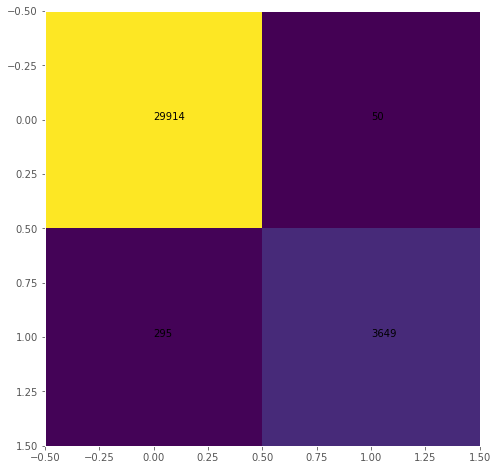

In [51]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_5f_RF)
ax.grid(False)
for i in range (len(conf_matrix_5f_RF[0])):
    for j in range (len(conf_matrix_5f_RF[0])):
        ax.text(j,i,conf_matrix_5f_RF[i,j])
plt.show()

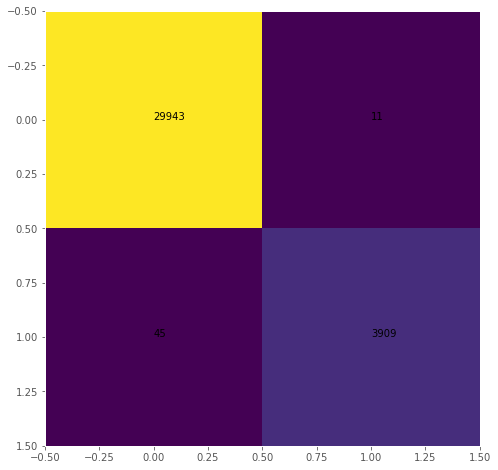

In [52]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_9f_RF)
ax.grid(False)
for i in range (len(conf_matrix_9f_RF[0])):
    for j in range (len(conf_matrix_9f_RF[0])):
        ax.text(j,i,conf_matrix_9f_RF[i,j])
plt.show()

In [ ]:
### DECISION TREE

In [53]:
model_5f_DT = DecisionTreeClassifier().fit(x_5f_train,y_5f_train)


model_9f_DT = DecisionTreeClassifier().fit(x_9f_train,y_9f_train)

In [54]:
y_train_prediksi_5f_DT = model_5f_DT.predict(x_5f_train)
print(y_train_prediksi_5f_DT)
y_train_prediksi_9f_DT = model_9f_DT.predict(x_9f_train)
print(y_train_prediksi_9f_DT)

[0 0 0 ... 0 0 0]
[0 1 0 ... 0 1 0]


In [55]:
perf_model_5f_DT = model_5f_DT.score(x_5f_train,y_5f_train)
print('performance model DT 5 features: ',perf_model_5f_DT)
perf_model_9f_DT = model_9f_DT.score(x_9f_train,y_9f_train)
print('performance model DT 9 features: ',perf_model_9f_DT)

performance model DT 5 features:  0.990002359325233
performance model DT 9 features:  0.9984074554677362


In [56]:
conf_matrix_5f_DT = confusion_matrix(y_5f_train,y_train_prediksi_5f_DT)
print(conf_matrix_5f_DT)
conf_matrix_9f_DT = confusion_matrix(y_9f_train,y_train_prediksi_9f_DT)
print(conf_matrix_9f_DT)

[[29961     3]
 [  336  3608]]
[[29954     0]
 [   54  3900]]


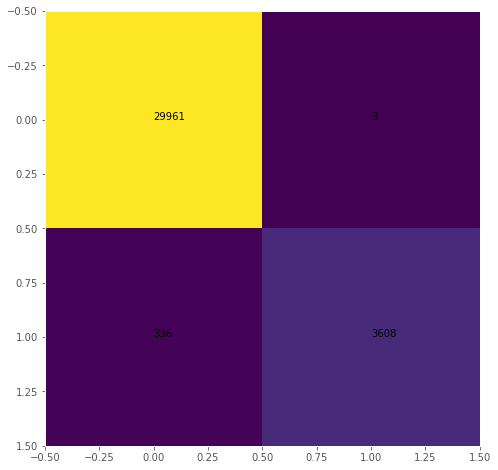

In [57]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_5f_DT)
ax.grid(False)
for i in range (len(conf_matrix_5f_DT[0])):
    for j in range (len(conf_matrix_5f_DT[0])):
        ax.text(j,i,conf_matrix_5f_DT[i,j])
plt.show()

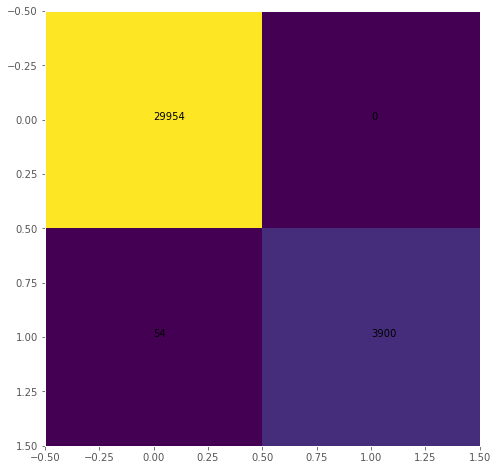

In [58]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_9f_DT)
ax.grid(False)
for i in range (len(conf_matrix_9f_DT[0])):
    for j in range (len(conf_matrix_9f_DT[0])):
        ax.text(j,i,conf_matrix_9f_DT[i,j])
plt.show()

In [ ]:
###KESIMPULAN

In [59]:
rekap_score_5f = {'Model':['k-NN', 'Gaussian Naive Bayes', 'Random Forest', 'Decision Tree'], 
        'Score':[performance_model_5f, perf_model_5f_GNB, perf_model_5f_RF, perf_model_5f_DT]} 
output_rekap_score_5f = pd.DataFrame(rekap_score_5f)
output_rekap_score_5f

,Model,Score
0,k-NN,0.906970
1,Gaussian Naive Bayes,0.886870
2,Random Forest,0.989825
3,Decision Tree,0.990002


In [60]:
rekap_score_9f = {'Model':['k-NN', 'Gaussian Naive Bayes', 'Random Forest', 'Decision Tree'], 
        'Score':[performance_model_9f, perf_model_9f_GNB, perf_model_9f_RF, perf_model_9f_DT]} 
output_rekap_score_9f = pd.DataFrame(rekap_score_9f)
output_rekap_score_9f

,Model,Score
0,k-NN,0.908695
1,Gaussian Naive Bayes,0.888374
2,Random Forest,0.998348
3,Decision Tree,0.998407


dengan modelling menggunakan 5 maupun 9 feature, performance yang terbaik yang didapatkan adalah Decision Tree